# Machine Learning Assignment - Medical Insurance Cost with Linear Regression

  
   
## Sanket M. Bairagi
**B.K.Birla College Kalyan.**  
**M.sc. Data Science And Big Data Analytics. Part 1**

Dataset Link - https://www.kaggle.com/code/mariapushkareva/medical-insurance-cost-with-linear-regression/data

## Which Factors Influence the Price of Health Insurance?  
  
  
  
Many factors that affect how much you pay for health insurance are not within your control. Nonetheless, it's good to have an 
understanding of what they are.    
    
Here are some factors that affect how much health insurance premiums cost

* **age** : age of primary beneficiary
  
* **sex** : insurance contractor gender, female, male
  
* **bmi** : Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
  
* **children** : Number of children covered by health insurance / Number of dependents
  
* **smoker** : Smoking
  
* **region** : the beneficiary's residential area in the US, northeast, southeast, southwest, northwest

### EDA and Visualizations

In [85]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [86]:
# Reading "insurance.csv" Dataset.

data= pd.read_csv("insurance.csv")

In [87]:
# Top 5 Rows of DataSet.

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [88]:
# Shape of Dataset.

data.shape

(1338, 7)

"insurance.csv"  dataset conatints 1338 Rows and 7 Columns.

In [89]:
# Name of columns

data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [90]:
# Check for null values.

data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

We have 0 missing values which is excellent for further proceses.

In [91]:
# information of datset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


dataset have float- 2 , int - 2 , object -3  datatype.

In [92]:
# Describing the dataset

data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


in the dataset columns -  

"age"         min - 18.000000 and max - 64.000000     
"bmi"         min - 64.000000	and max- 53.130000    
"children"    min - 0 and max - 5  
"charges"     min - 5.000000 and max - 5.000000  

-----------------------------------------------------  

Average -

"age" - 39.207025  
"bmi" - 30.663397  
"children" - 1.094918  
"charges" - 13270.422265

-----------------------------------------------------  



In [93]:
# counts

data["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [94]:
data.groupby(["sex"])["smoker"].value_counts()

sex     smoker
female  no        547
        yes       115
male    no        517
        yes       159
Name: smoker, dtype: int64

In [95]:
data["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [96]:
data.groupby(["smoker"])["charges"].sum()

smoker
no     8.974061e+06
yes    8.781764e+06
Name: charges, dtype: float64

In [97]:
# smoker
print("no  ",8.974061e+06)
print("yes ",8.781764e+06)

no   8974061.0
yes  8781764.0


In [98]:
# count of males and females belongs to regions
data.groupby(["sex"])["region"].value_counts()

sex     region   
female  southeast    175
        northwest    164
        southwest    162
        northeast    161
male    southeast    189
        northeast    163
        southwest    163
        northwest    161
Name: region, dtype: int64

## Visualizations

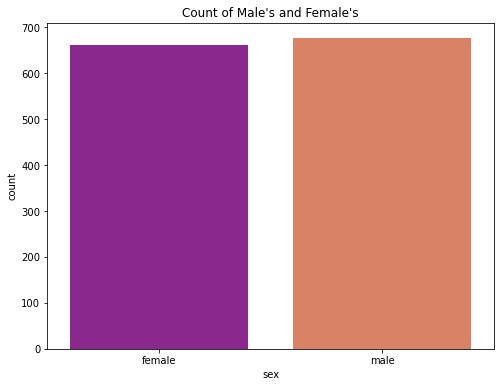

In [169]:
# bar plot for count of males and females.
plt.subplots(figsize=(8,6))
plt.title("Count of Male's and Female's")
sns.countplot("sex",data=data,palette=("plasma"),)
plt.show()


Count of Male is slightly greater than count of females.

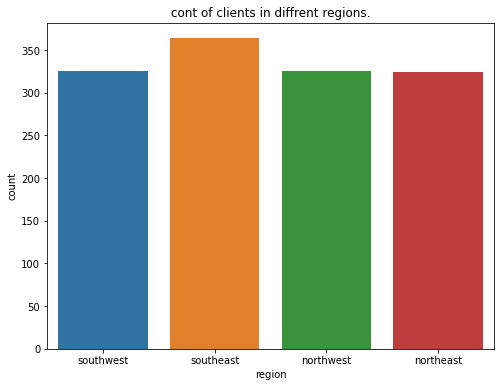

In [100]:
# cont of clients in diffrent regions.
plt.subplots(figsize=(8,6))
plt.title("cont of clients in diffrent regions.")
sns.countplot("region",data=data)
plt.show()

Maximum peoples belongs to **southest** and count of **southwest**, **northwest**,**northeast** are approximatly equal

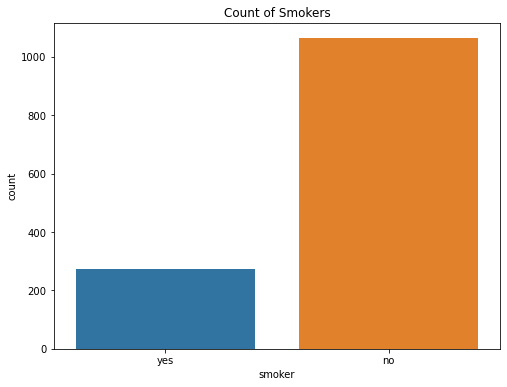

In [101]:
#cont of smokers
plt.subplots(figsize=(8,6))
plt.title("Count of Smokers")
sns.countplot("smoker",data=data)
plt.show()

As above graph very few people have smooking habbit.

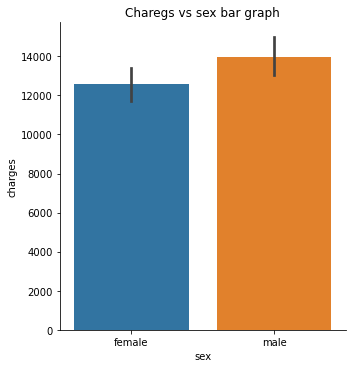

In [102]:
# charegs paid by femals and males
sns.catplot(x="sex",y="charges",kind="bar",data=data)
plt.title("Charegs vs sex bar graph")
plt.show()

males client paying the charegs for health insurance than female client.

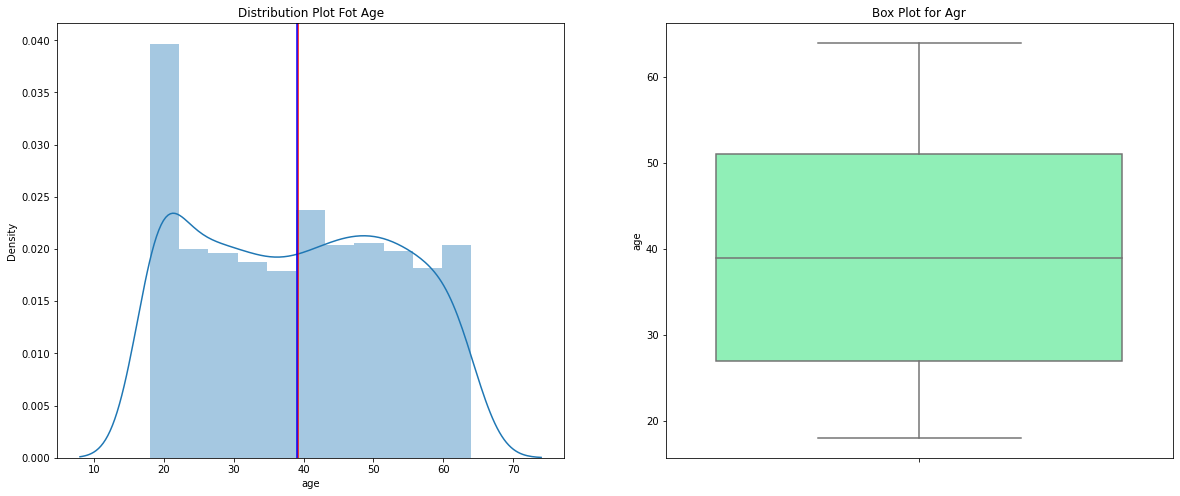

In [103]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Distribution Plot Fot Age')
sns.distplot(data.age)
plt.axvline(data.age.mean(), color="r")
plt.axvline(data.age.median(), color="b")

plt.subplot(1,2,2)
plt.title('Box Plot for Agr')
sns.boxplot(y=data.age, palette=("rainbow"))

plt.show()

age of the clients is uniformally distributed. maximum count is for age 18-19 age group.


In [104]:
print("Average age - ",data.age.mean())
print("median of age ",data.age.median())

Average age -  39.20702541106129
median of age  39.0


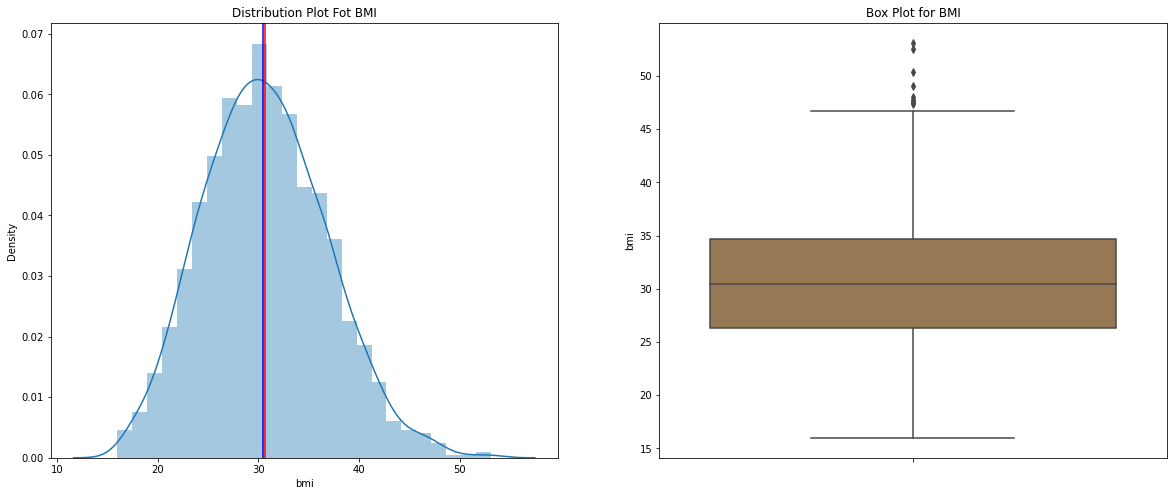

In [105]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Distribution Plot Fot BMI')
sns.distplot(data.bmi)
plt.axvline(data.bmi.mean(), color="r")
plt.axvline(data.bmi.median(), color="b")

plt.subplot(1,2,2)
plt.title('Box Plot for BMI')
sns.boxplot(y=data.bmi, palette=("cubehelix"))

plt.show()

in the dataset bmi is normally distributed.
some outliers are present in the dataset.


In [106]:
print("Average bmi - ",data.bmi.mean())
print("median of bmi - ",data.bmi.median())

Average bmi -  30.663396860986538
median of bmi -  30.4


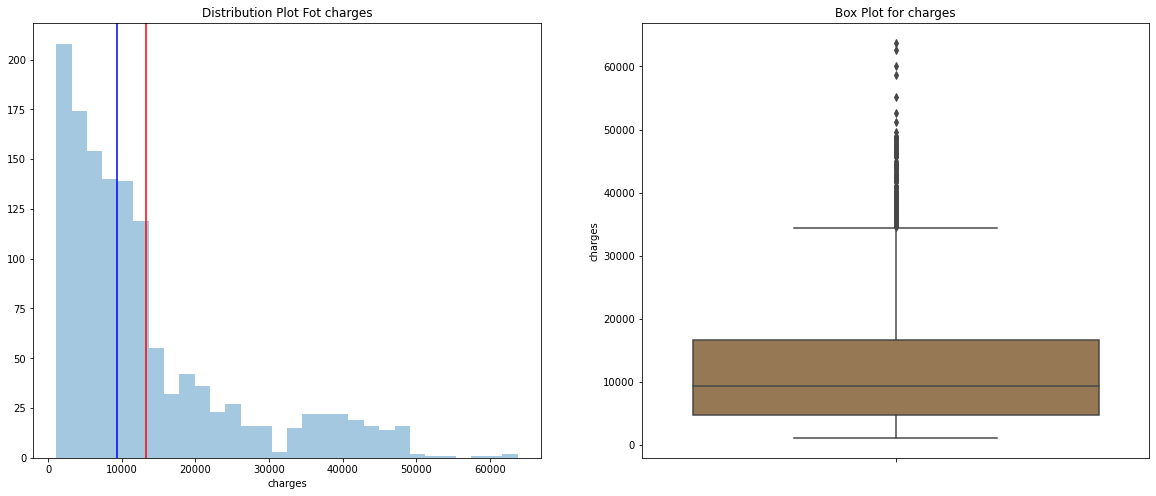

In [107]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Distribution Plot Fot charges')
sns.distplot(data.charges,kde=False)
plt.axvline(data.charges.mean(), color="r")
plt.axvline(data.charges.median(), color="b")

plt.subplot(1,2,2)
plt.title('Box Plot for charges')
sns.boxplot(y=data.charges, palette=("cubehelix"))

plt.show()

This distribution is right-skewed.
Many clients spends money within USD 1121 to USD 13000 over heath insuarnece , very few clients spends more than USD 50000 on insuarence.  
the the charges column many outliers are presemt.

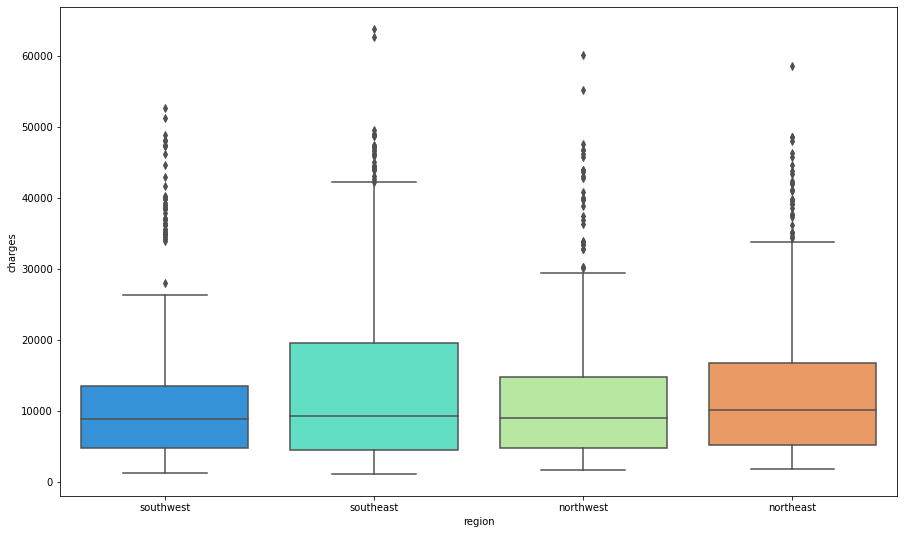

In [108]:
plt.figure(figsize=(15,9))
sns.boxplot(x="region", y="charges", data=data, palette="rainbow")
plt.show()

maximum client from region southeast and minimum form southwest.


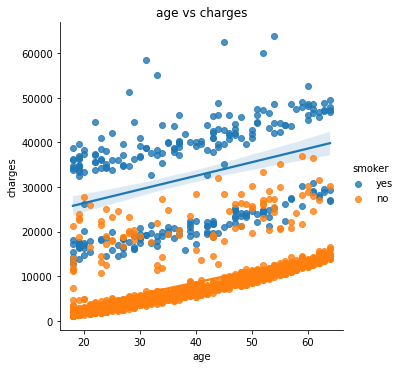

In [109]:
sns.lmplot(x="age",y="charges",data=data,hue="smoker")
plt.title("age vs charges")
plt.show()

Smoking has the highest impact on medical costs, even though the costs is growing with age.

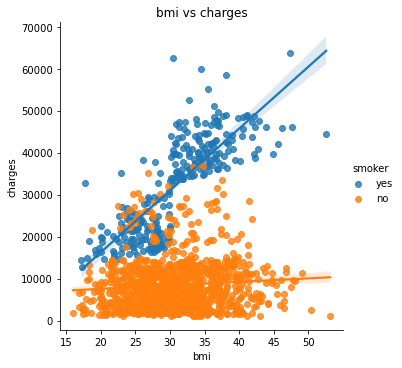

In [110]:
sns.lmplot(x="bmi",y="charges",data=data,hue="smoker")
plt.title("bmi vs charges")
plt.show()

Smoking has the highest impact on medical costs, even though the costs is growing with bmi.

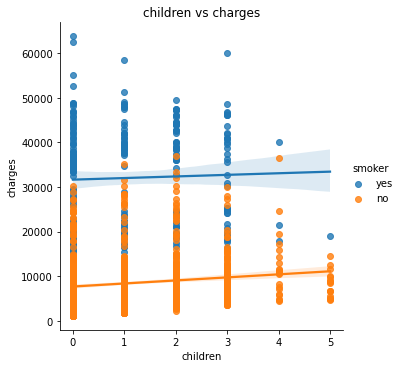

In [111]:
sns.lmplot(x="children",y="charges",data=data,hue="smoker")
plt.title("children vs charges")
plt.show()

people who have children generally smoke less.also people who smoke spends charges more on the insurance.

### Dummy Variables / Dummification / One Hot Encoding

In [112]:
data.select_dtypes(["object"]).head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


we have 3 categorical datatype. 
1. sex - showing gender of clients.
2. smoker - showing smoking habit as yes or no.
3. region- there is 4 region.

In [113]:
cat_cols=list(data.select_dtypes(["object","category"]))
cat_cols

['sex', 'smoker', 'region']

In [114]:
data_1=pd.get_dummies(data,columns=cat_cols,drop_first=True)
data_1.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [115]:
data_1.shape

(1338, 9)

In [116]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_male          1338 non-null   uint8  
 5   smoker_yes        1338 non-null   uint8  
 6   region_northwest  1338 non-null   uint8  
 7   region_southeast  1338 non-null   uint8  
 8   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(2), uint8(5)
memory usage: 48.5 KB


All categorycal column is converted into numeric datatype.

In [117]:
# making X as a independent variable and y as a dependent veraible.

X=data_1.drop(["charges"],axis=1)
y=data_1["charges"]

In [118]:
# train_test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=100,test_size=.25)

In [119]:
print("X_train shape  -  ",X_train.shape)
print("X_test shape   -  ",X_test.shape)
print("-"*50)
print("y_train shape  -  ",y_train.shape)
print("y_test shape   -  ",y_test.shape)

X_train shape  -   (1003, 8)
X_test shape   -   (335, 8)
--------------------------------------------------
y_train shape  -   (1003,)
y_test shape   -   (335,)


In [120]:
y_train=y_train.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)
print("y_train shape  -  ",y_train.shape)
print("y_test shape   -  ",y_test.shape)

y_train shape  -   (1003, 1)
y_test shape   -   (335, 1)


<AxesSubplot:>

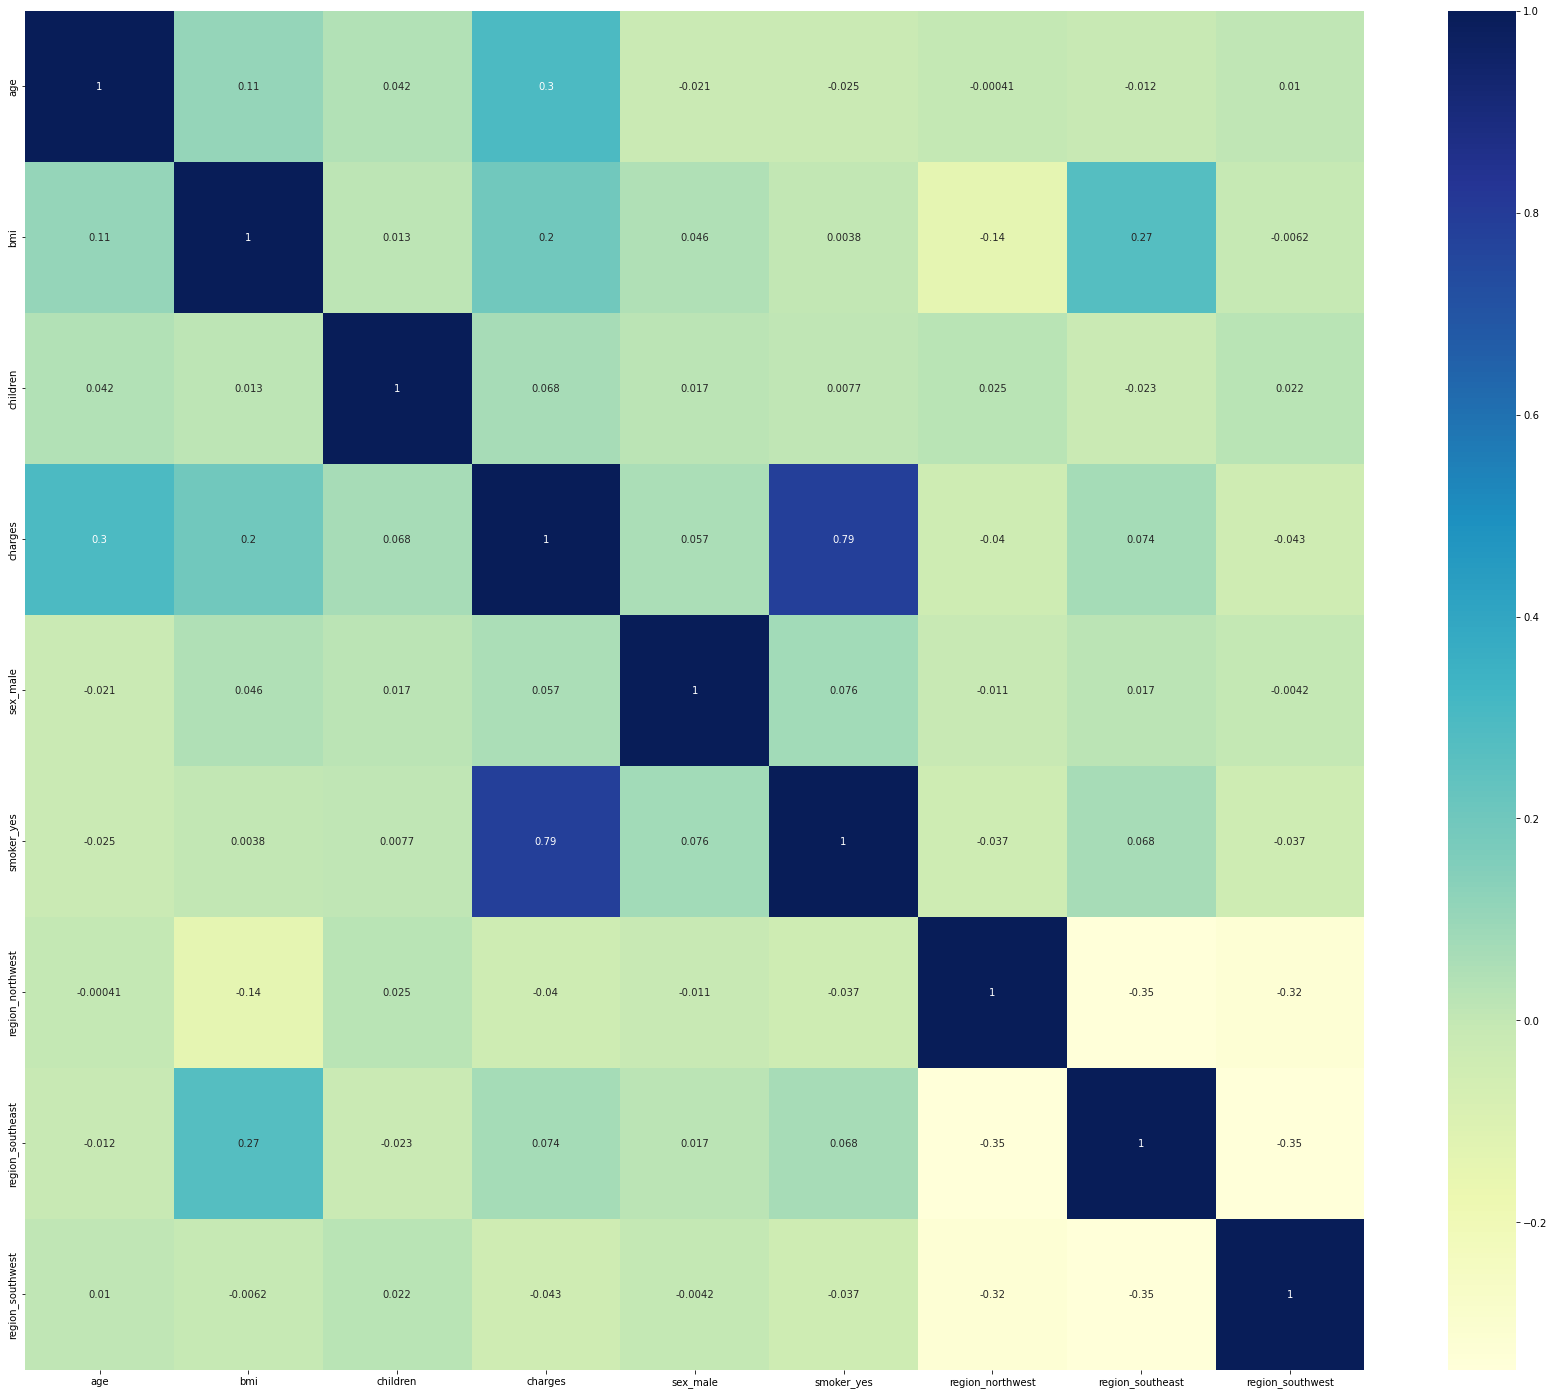

In [121]:
plt.figure(figsize = (30, 25))
sns.heatmap(data_1.corr(),annot = True, cmap="YlGnBu")

from above heatmap smoker vs charegse has high correlation also bmi and age js also correlated to charges.

In [122]:
# Data need scalling.
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
num_var=["age","bmi"]
X_train[num_var]=sc.fit_transform(X_train[num_var])
X_test[num_var]=sc.transform(X_test[num_var])

In [123]:
X_test.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
12,0.108696,0.496099,0,1,0,0,0,1
306,0.217391,0.310465,2,0,0,0,0,1
318,0.565217,0.314366,0,0,0,1,0,0
815,0.043478,0.417003,0,0,0,0,1,0
157,0.000000,0.247915,0,1,1,0,0,0


In [124]:
y_train=sc.fit_transform(y_train)
y_test=sc.transform(y_test)

In [125]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.7807756903022633

we get 78.07 % accuresy for Linear regression.

### Model Building

### RFE - 

In [126]:
# importing libraries.
from sklearn.feature_selection import RFE
import statsmodels.api as sm

In [127]:
X_train.columns

Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [128]:
len(X_train.columns)

8

data have 8 independent columns in which many of them are not required to be include in the model, so we have to remove them to get better accurecy.

In [129]:
# we selecting any best 6 columns out of 8 
lm= LinearRegression()
rfe= RFE(lm,n_features_to_select=6)
rfe=rfe.fit(X_train,y_train)

In [130]:
rfe.support_

array([ True,  True, False, False,  True,  True,  True,  True])

In [131]:
# selected columns
X_train.loc[:,rfe.support_].columns

Index(['age', 'bmi', 'smoker_yes', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')

In [132]:
rfe.ranking_

array([1, 1, 2, 3, 1, 1, 1, 1])

In [133]:
# making new train data set with only those columns which is selected by RFE
X_train_rfe= X_train[X_train.columns[rfe.support_]]

#### Model 1

In [134]:
def build_model(x,y):
    x=sm.add_constant(x)
    lm=sm.OLS(y,x).fit()
    print(lm.summary())
    return x

In [135]:
X_train_new= build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     467.5
Date:                Wed, 25 May 2022   Prob (F-statistic):          1.49e-285
Time:                        17:26:45   Log-Likelihood:                 898.60
No. Observations:                1003   AIC:                            -1783.
Df Residuals:                     996   BIC:                            -1749.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0336      0.010  

p-value of `region_northwest` seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [136]:
# Droping region_northwest
X_train_new=X_train_rfe.drop(["region_northwest"],axis=1)

#### Model 2

In [137]:
X_train_new=build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     560.8
Date:                Wed, 25 May 2022   Prob (F-statistic):          9.81e-287
Time:                        17:26:45   Log-Likelihood:                 898.11
No. Observations:                1003   AIC:                            -1784.
Df Residuals:                     997   BIC:                            -1755.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0381      0.009  

p-value of `region_southeast` seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [138]:
# Droping region_southeast
X_train_new=X_train_rfe.drop(["region_southeast"],axis=1)

#### Model 3

In [139]:
X_train_new=build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     559.0
Date:                Wed, 25 May 2022   Prob (F-statistic):          3.14e-286
Time:                        17:26:45   Log-Likelihood:                 896.93
No. Observations:                1003   AIC:                            -1782.
Df Residuals:                     997   BIC:                            -1752.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0389      0.010  

p-value of `region_northwest` seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [140]:
# Droping region_northwest
X_train_new=X_train_new.drop(["region_northwest"],axis=1)

#### Model 4

In [141]:
X_train_new=build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     699.5
Date:                Wed, 25 May 2022   Prob (F-statistic):          1.12e-287
Time:                        17:26:45   Log-Likelihood:                 896.93
No. Observations:                1003   AIC:                            -1784.
Df Residuals:                     998   BIC:                            -1759.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0392      0.009  

p-value of `region_southwest` seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [142]:
X_train_new=X_train_new.drop(["region_southwest"],axis=1)

#### Model 5


In [143]:
X_train_new=build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     931.0
Date:                Wed, 25 May 2022   Prob (F-statistic):          9.30e-289
Time:                        17:26:45   Log-Likelihood:                 895.91
No. Observations:                1003   AIC:                            -1784.
Df Residuals:                     999   BIC:                            -1764.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0417      0.009     -4.606      0.0

All p-value seems to be less than the significance value of 0.05, hence no need drop any columns.

In [144]:
#Calculating the Variance Inflation Factor

from statsmodels.stats.outliers_influence import variance_inflation_factor
def checkVIF(X):
    vif = pd.DataFrame() # expty dataframe
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

checkVIF(X_train_new)

,Features,VIF
0,const,8.35
1,age,1.01
2,bmi,1.01
3,smoker_yes,1.00


### Residual Analysis of Model

In [145]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_prd = lm.predict(X_train_new)

In [146]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     931.0
Date:                Wed, 25 May 2022   Prob (F-statistic):          9.30e-289
Time:                        17:26:45   Log-Likelihood:                 895.91
No. Observations:                1003   AIC:                            -1784.
Df Residuals:                     999   BIC:                            -1764.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0417      0.009     -4.606      0.0

In [147]:
y_train_prd=y_train_prd.values.reshape(-1,1)

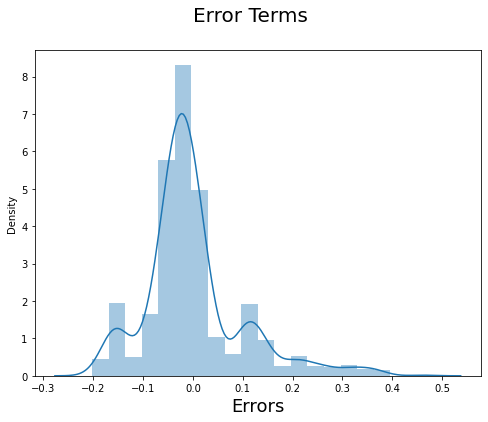

In [148]:
# Plot the histogram of the error terms
plt.figure(figsize=(8,6))

sns.distplot((y_train - y_train_prd), bins = 20)
plt.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 
plt.show()

Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled.

### Prediction and Evaluation

In [149]:
X_train_new.columns

Index(['const', 'age', 'bmi', 'smoker_yes'], dtype='object')

In [150]:
X_train_new=X_train_new.drop(["const"],axis=1)
X_test_new=X_test[X_train_new.columns]

X_test_new=sm.add_constant(X_test_new)

In [151]:
y_pred= lm.predict(X_test_new)

In [152]:
X_train_new.columns

Index(['age', 'bmi', 'smoker_yes'], dtype='object')

In [153]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7783348011090813

we get 77.83 % accurecy of Linrar model. haveing 'const', 'age', 'bmi', 'smoker_yes'as independent veriables.

Text(0, 0.5, 'y_pred')

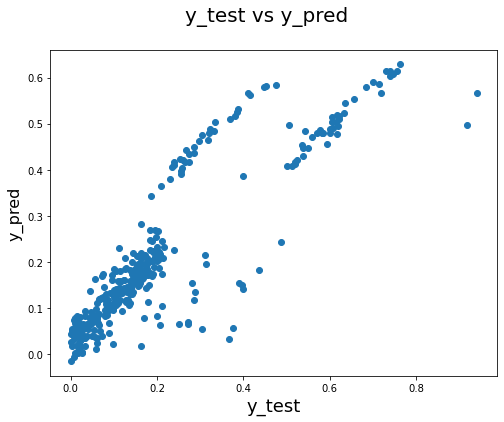

In [154]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(8,6))

plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

In [155]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     931.0
Date:                Wed, 25 May 2022   Prob (F-statistic):          9.30e-289
Time:                        17:26:46   Log-Likelihood:                 895.91
No. Observations:                1003   AIC:                            -1784.
Df Residuals:                     999   BIC:                            -1764.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0417      0.009     -4.606      0.0

p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.

**Which Factors Influence the Price of Health Insurance?**

we have 3 major fators that affecting on the charges.
out of the we have to find which most affecting on charegs.
to get this answer we applying Linear regression.

In [156]:
X_train.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
999,0.391304,0.293920,0,0,0,1,0,0
884,0.152174,0.288808,4,1,0,1,0,0
517,0.586957,0.391041,2,1,0,1,0,0
1132,0.847826,0.654291,0,1,0,0,0,0
1188,0.543478,0.250471,1,0,1,0,0,0


In [157]:
X_test.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
12,0.108696,0.496099,0,1,0,0,0,1
306,0.217391,0.310465,2,0,0,0,0,1
318,0.565217,0.314366,0,0,0,1,0,0
815,0.043478,0.417003,0,0,0,0,1,0
157,0.000000,0.247915,0,1,1,0,0,0


#### Linear Regression model 1 - Age vs charges

In [158]:
age_train=X_train["age"].values.reshape(-1,1)
age_train.shape

(1003, 1)

In [159]:
age_test=X_test["age"].values.reshape(-1,1)
age_test.shape

(335, 1)

In [160]:
lrage=LinearRegression()
lrage.fit(age_train,y_train)
y_pred_age=lrage.predict(age_test)

print(r2_score(y_test,y_pred_age))

0.039335237789680844


we get 3.93% R2 score.

### Linear Regression model 2 - bmi vs charges

In [161]:
bmi_train=X_train["bmi"].values.reshape(-1,1)
bmi_train.shape

(1003, 1)

In [162]:
bmi_test=X_test["bmi"].values.reshape(-1,1)
bmi_test.shape

(335, 1)

In [168]:
lrbmi=LinearRegression()
lrbmi.fit(bmi_train,y_train)
y_pred_bmi=lrbmi.predict(bmi_test)

print(r2_score(y_test,y_pred_bmi))

0.042768452023143944


we get 4.27% R2 score.

### Linear Regression model 3 - smoker_yes vs charges

In [164]:
smoker_yes_train=X_train["smoker_yes"].values.reshape(-1,1)
smoker_yes_train.shape

(1003, 1)

In [165]:
smoker_yes_test=X_test["smoker_yes"].values.reshape(-1,1)
smoker_yes_test.shape

(335, 1)

In [166]:
lrsmoker=LinearRegression()
lrsmoker.fit(smoker_yes_train,y_train)
y_pred_smoker_yes=lrsmoker.predict(smoker_yes_test)

print(r2_score(y_test,y_pred_smoker_yes))

0.6505586158241478


we get 65.05% score.which is highest than age and bmi over chares

**Conclusion** : like we previously noticed smoking is the greatest factor that affects medical cost charges, then it's bmi and age.